# Dejunkifying a Plot


Nesta palestra, quero orientá-lo no processo de obter um gráfico regular do Matplotlib e aplicar os princípios de proporção de tinta de dados e lixo gráfico de Tufte para torná-lo um pouco melhor. 

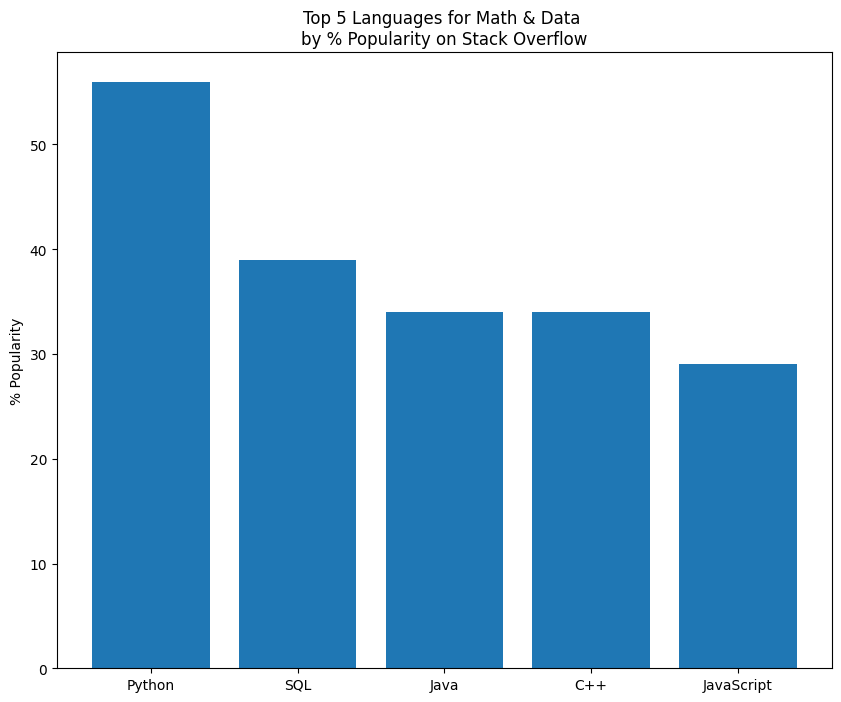

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Here there are five different languages,
# Python, SQL, Java, C++, and JavaScript.
# We'll find their positions as a rank
# using NumPy as a range function.
# And here are the popularity
# values from Stack Overflow.
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.figure(figsize=(10, 8));
plt.bar(pos, popularity, align='center');
plt.xticks(pos, languages);
plt.ylabel('% Popularity');
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow');

Ok, aqui está o primeiro desafio - nosso plot tem essa moldura, mas não é realmente necessário e parece um pouco pesado.

Vamos remover essa ink. Isso é um pouco mais complicado, mas podemos obter o eixo atual e iterar por toda a `spine`, definindo sua visibilidade como falsa.

Isso já fará com que o gráfico pareça muito mais leve.

plt.gca():  AxesSubplot(0.125,0.11;0.775x0.77)
plt.gca().spines:  <matplotlib.spines.Spines object at 0x7fd8b65d4460>
plt.gca().spines.values():  ValuesView(<matplotlib.spines.Spines object at 0x7fd8b65d4460>)
iterando...
plt.gca().spines:  ['left', 'right', 'bottom', 'top']
plt.gca().spines.values():  [<matplotlib.spines.Spine object at 0x7fd8b65d44f0>, <matplotlib.spines.Spine object at 0x7fd8b65d45e0>, <matplotlib.spines.Spine object at 0x7fd8b65d46d0>, <matplotlib.spines.Spine object at 0x7fd8b65d47c0>]


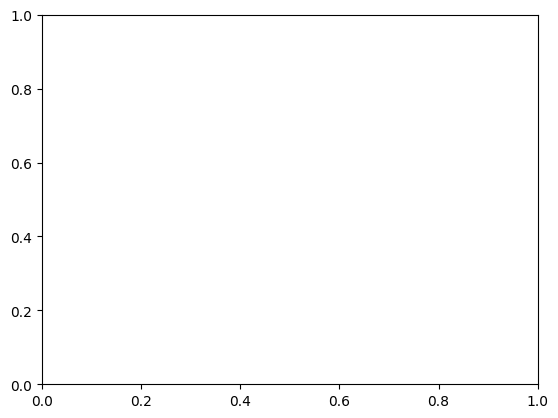

In [2]:
print("plt.gca():  " + str(plt.gca()))
print("plt.gca().spines:  " + str(plt.gca().spines))
print("plt.gca().spines.values():  " + str(plt.gca().spines.values()))
print("iterando...")
print("plt.gca().spines:  " + str(list(plt.gca().spines)))
print("plt.gca().spines.values():  " + str(list(plt.gca().spines.values())))

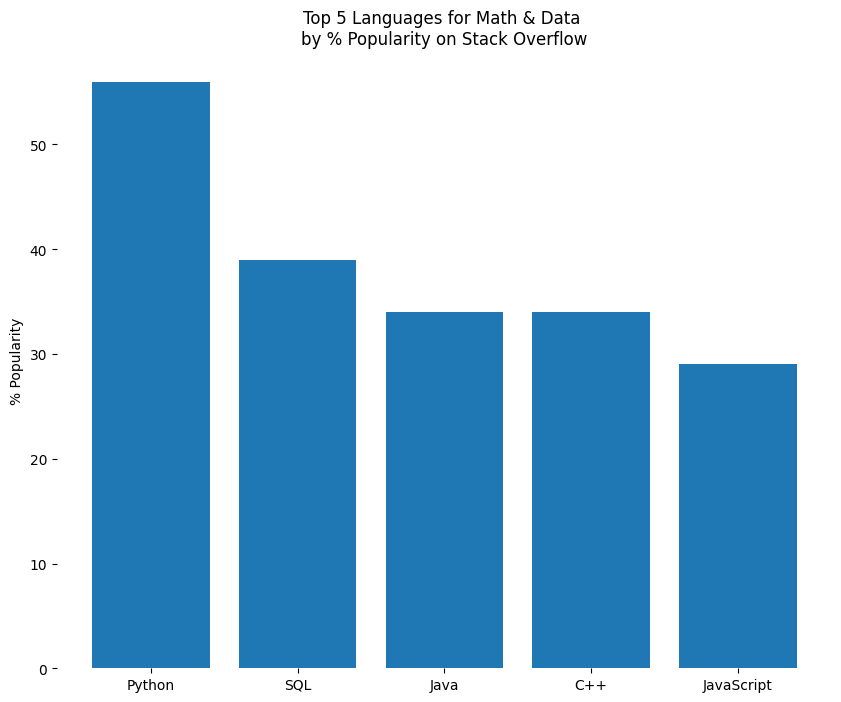

In [3]:
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.figure(figsize=(10, 8));
plt.bar(pos, popularity, align='center');
plt.xticks(pos, languages);
plt.ylabel('% Popularity');
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow');

for spine in plt.gca().spines.values():
    spine.set_visible(False)

Agora, o azul está bom, mas não nos ajuda a diferenciar as barras em nada. Que tal suavizarmos todos os pretos duros para cinza e depois mudarmos as cores da barra para cinza também?

Além disso, vamos manter a barra do Python com a mesma cor azul que era originalmente para destacá-la.

In [25]:
list(bars)

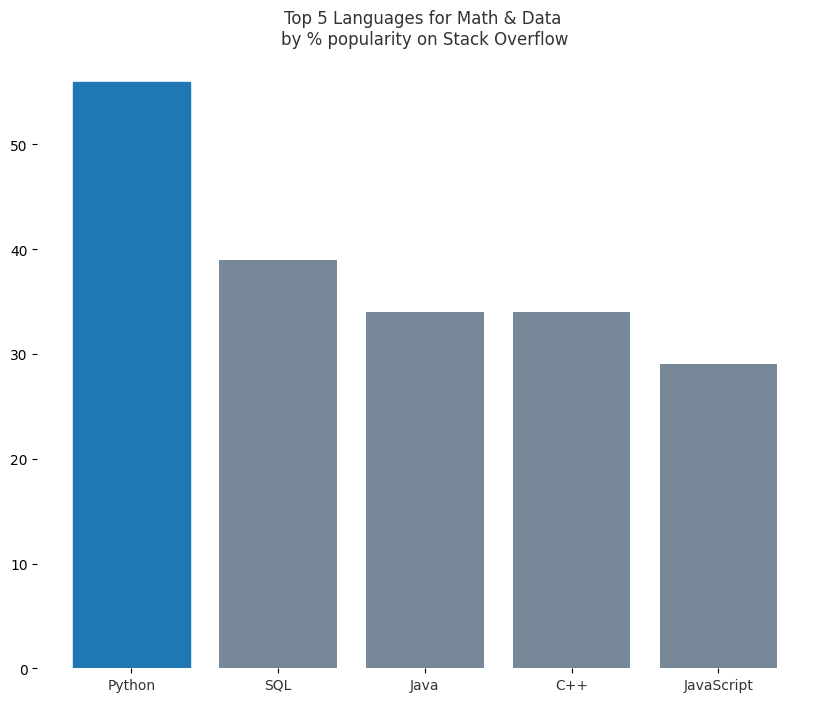

In [20]:
plt.figure(figsize=(10, 8));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

bars=plt.bar(pos, popularity, align='center', linewidth=1,color='lightslategrey')
bars[0].set_color('#1F77B4')

plt.xticks(pos, languages, alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)


Agora vamos corrigir o eixo y removendo os rótulos e apenas rotulando diretamente as barras individuais.

Na verdade, não precisamos do rótulo do eixo y, pois o título nos diz tudo o que precisamos saber sobre as unidades neste gráfico.

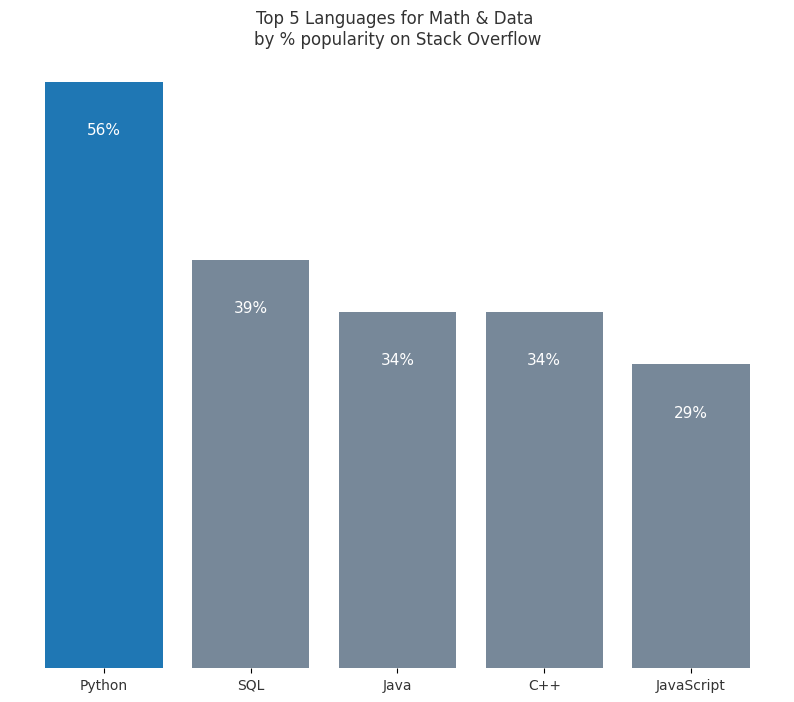

In [50]:
plt.figure(figsize=(10, 8));
languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
bars[0].set_color('#1F77B4')

plt.xticks(pos, languages, alpha=0.8)

# We can remove the y label by just setting it to an empty list
plt.yticks([])

plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# Remover a etiqueta é fácil, mas mudar
# as barras é um pouco chato.
# Para isso, queremos iterar sobre cada
# das barras e pegar a sua altura.
# Então queremos criar um novo texto
# objeto com as informações de dados.

for bar in bars:
    # Infelizmente, isso significa fazer
    # um pouco de jogo com padding.
    # Aqui vou configurar a localização x para a barra
    # x mais a largura dividida por dois e
    # a localização y a ser
    # a altura da barra menos cinco.

    # Pode parecer estranho ficar no meio
    # da barra na dimensão x, mas
    # é porque estou definindo o rótulo
    # para centralizar-se, horizontalmente.
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height()-5, str(int(height)) + '%',
                   ha='center', color='w', fontsize=11)

E isso é tudo. Uma série simples de etapas para tornar seus gráficos de barras um pouco mais utilizáveis.

